In [56]:
# Ex 3 - Dataset Titanic

import pandas as pd

In [57]:
titanic_train = pd.read_csv('TitanicData\\train.csv')
titanic_test = pd.read_csv('TitanicData\\test.csv')

In [58]:
# Survived -> 0 = não, 1 = sim
# Pclass -> Primeira classe = 1, Segunda classe = 2, Terceira classe = 3
# Sibsp -> Num cônjuges/irmãos abordo
# Parch -> Num pais/filhos abordo
# Ticket -> Número do bilhete
# Fare -> Preço da passagem
# Cabin -> Número da cabine
# Embarked -> Porto de embarque -> C = Cherbourg, Q = Queenstown, S = Southampton

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

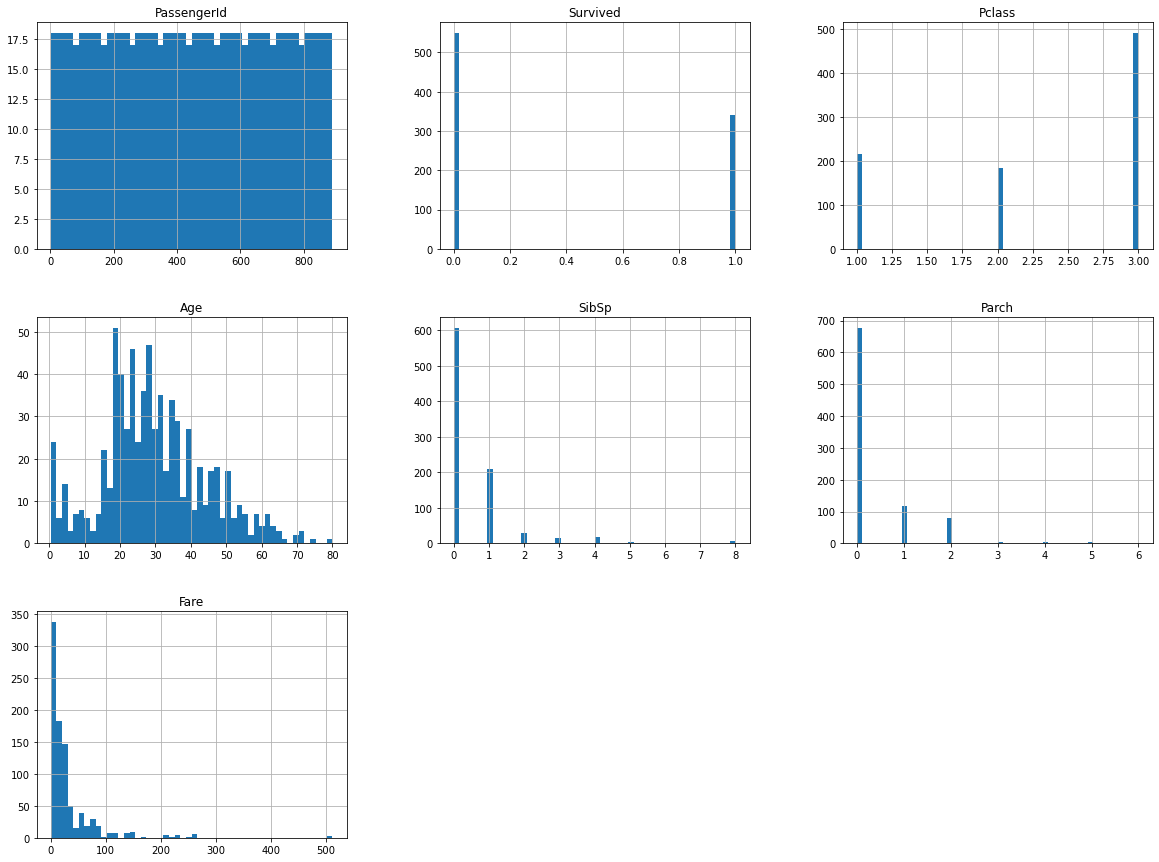

In [60]:
import matplotlib.pyplot as plt

titanic_train.hist(bins=50, figsize=(20,15))

In [61]:
# Verificando se há valores nulos
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
# Dropando colunas que não serão utilizadas
titanic_train = titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [63]:
# Verificando valores nulos do novo dataframe
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [64]:
# Divisão dos dados
from sklearn.model_selection import train_test_split

train, val = train_test_split(titanic_train, test_size=0.2)

In [65]:
# Separando em X e y
y_train = train['Survived']
X_train = train.drop(['Survived'], axis=1)
y_val = val['Survived']
X_val = val.drop(['Survived'], axis=1)

In [66]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
616,3,male,34.00,1,1,14.4000,S
469,3,female,0.75,2,1,19.2583,C
333,3,male,16.00,2,0,18.0000,S
881,3,male,33.00,0,0,7.8958,S
296,3,male,23.50,0,0,7.2292,C


In [67]:
# Usando ColumnTransformer para transformar as colunas
# Para selecionar as colunas que serão utilizadas podemos criar uma função que faça isso -> Cap 2 do livro
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([
    ("ImputerMean", SimpleImputer(strategy='mean'), ['Age', 'Fare']),
    ("ImputerMostFrequent", SimpleImputer(strategy='most_frequent'), ['Embarked', 'Sex']),
    ("ImputerMedian", SimpleImputer(strategy='median'), ['Pclass', 'SibSp', 'Parch']),
    ("OheCat", OneHotEncoder(drop=None), ['Sex', 'Embarked']),
],
    remainder='drop'
)

transformed = transformer.fit_transform(X_train)

In [68]:
# Criando um dataframe com as colunas transformadas
X_train_tr = pd.DataFrame(transformed)
X_train_tr.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,34.0,14.4,S,male,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.75,19.2583,C,female,3.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,16.0,18.0,S,male,3.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,33.0,7.8958,S,male,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,23.5,7.2292,C,male,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [69]:
# Dropando as colunas em string

X_train_tr.drop([2, 3], axis=1, inplace=True)
X_train_tr.head()

,0,1,4,5,6,7,8,9,10,11,12
0,34.0,14.4,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.75,19.2583,3.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,16.0,18.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,33.0,7.8958,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,23.5,7.2292,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [70]:
# Criando o modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 100, 200, 300, 400, 500],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_tr, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'min_samples_split': 8, 'n_estimators': 100}
0.8258459501944238


In [72]:
# Aplicando as transformações no dataframe de validação
transformed_val = transformer.transform(X_val)
X_val_tr = pd.DataFrame(transformed_val)
X_val_tr.drop([2, 3], axis=1, inplace=True)
X_val_tr.head()

,0,1,4,5,6,7,8,9,10,11,12
0,28.0,82.1708,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,36.0,135.6333,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,29.979216,23.45,3.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
3,19.0,13.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,37.0,26.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [73]:
# Testando o modelo
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(**grid_search.best_params_)
rf.fit(X_train_tr, y_train)

y_pred = rf.predict(X_val_tr)
accuracy_score(y_val, y_pred)

0.7988826815642458

<AxesSubplot:>

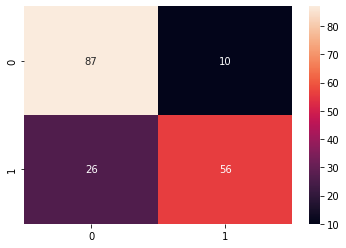

In [77]:
# Analisando o erro
# Survived -> 0 = não, 1 = sim
from sklearn.metrics import confusion_matrix
import seaborn as sn

conf_mx = confusion_matrix(y_val, y_pred)
sn.heatmap(conf_mx, annot=True, fmt='d')

Obs: No link do exercício resolvido apresenta uma frma bem interessante para comparar o resultado de dois modelos diferentes:
<br>
https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb